# Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline 

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import pickle 

# Import Data

In [4]:
df_segmentation = pd.read_csv('segmentation+data.csv', index_col = 0)

# Explore Data

In [6]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

In [9]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


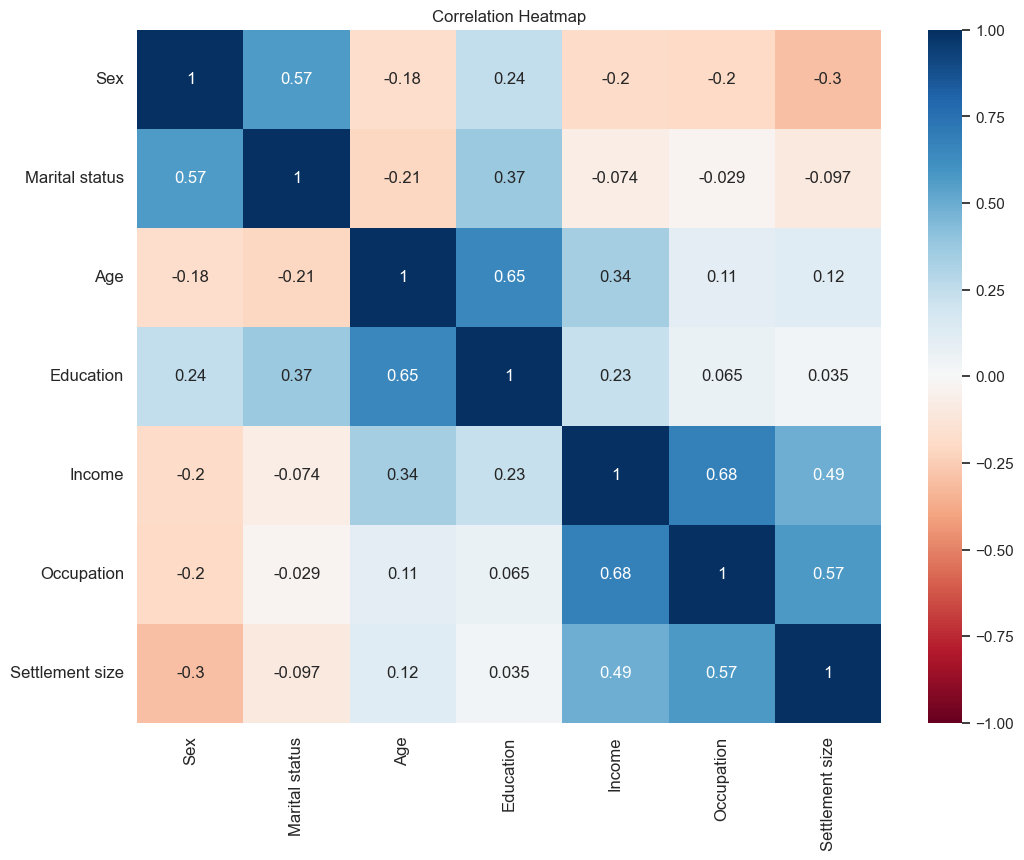

In [10]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

Exploring the correlations between the features of the consumers is the first step to identifying similar consumers 
and putting them together in groups, which is the essence of segmentation.

# Visualize Raw Data

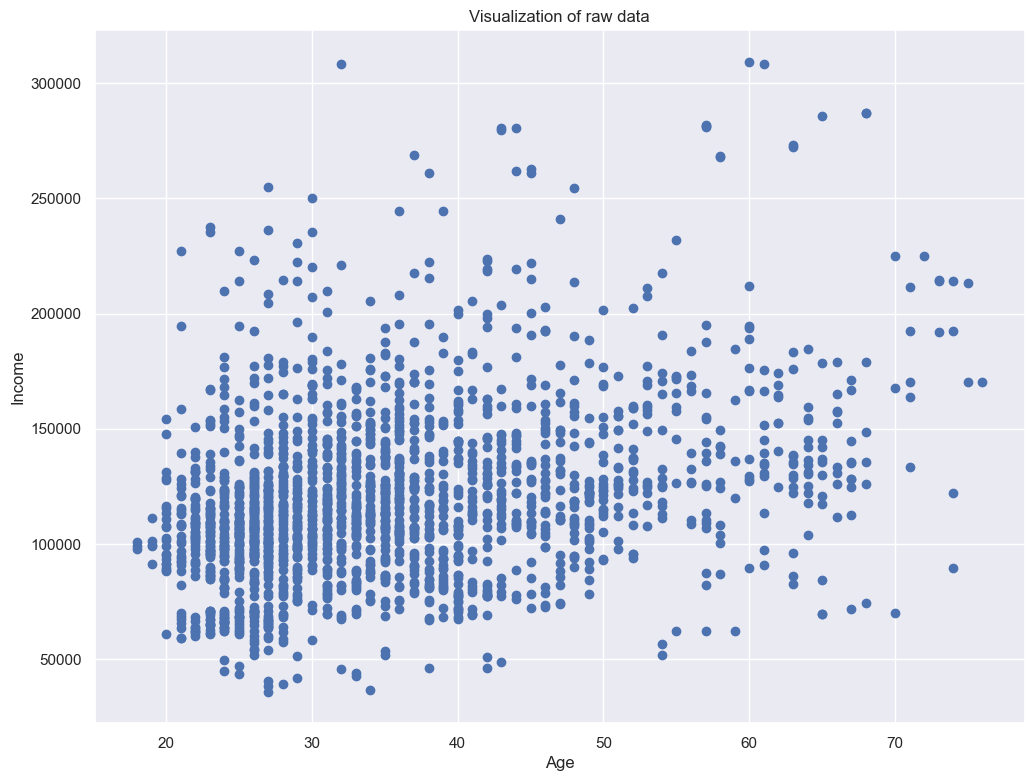

In [13]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')
plt.show()

Our segmentation models will be based on similarities and differences between individual consumers on the features that characterize them.
We'll quantify these similarities and differences.
We want to treat all features equally and it can be achieved by standardization.

# Standardization

In [16]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation) # fit calculates mean and std dev for each feature   # transform - uses those statistics to standardize the data

# Hierarchical Clustering

The main goal of clustering is to group individual observations so that the observations from one group are very similar to each other.
We will use hierarchical clustering approach.
We can measure distances between clusters using ward method.
ward method calculates the average of the squares of the distances between clusters.

In [19]:
hier_clust = linkage(segmentation_std, method='ward')

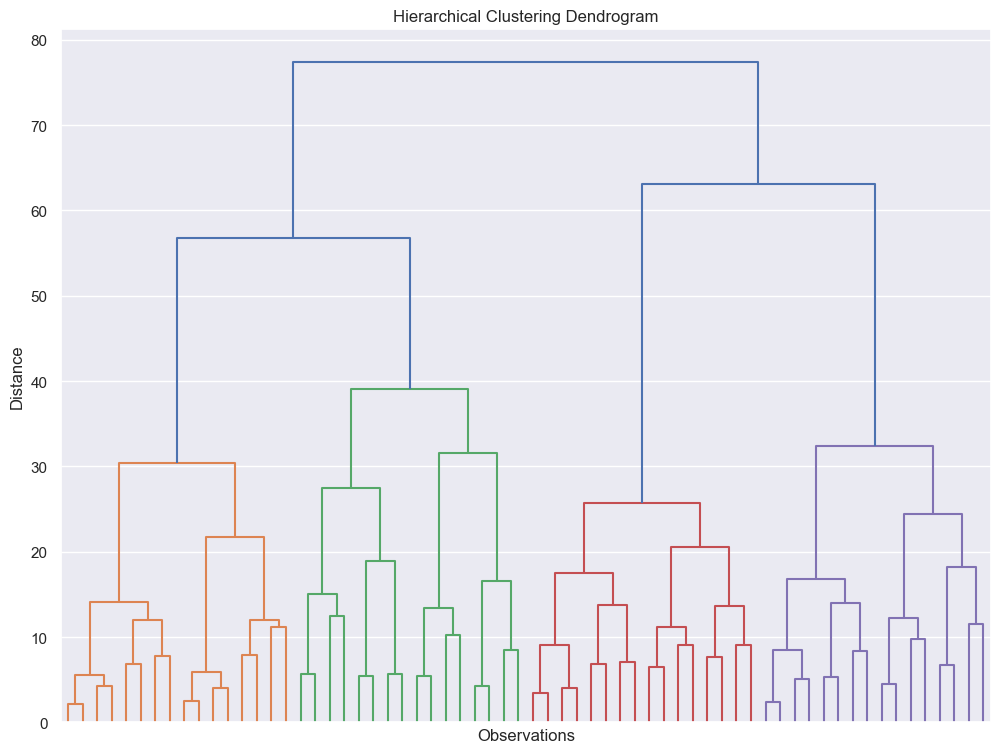

In [20]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,truncate_mode = 'level', p=5, show_leaf_counts=False, no_labels=True)
plt.show()

Smaller the distance between points, the further down in the tree they'll be grouped together.

If we have no prior knowledge about the number of clusters, we can start by performing hierarchical clustering to determine them.
Then we can move on to flat clustering techniques for segmentation.

# K-means Clustering

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)      # k-means ++ technique ensures centroids are at max distance from data points. And after that, we check which data points are nearer to these centroids.
    kmeans.fit(segmentation_std)    # this statement fits a k-means clustering model with i clusters to it
    wcss.append(kmeans.inertia_) 

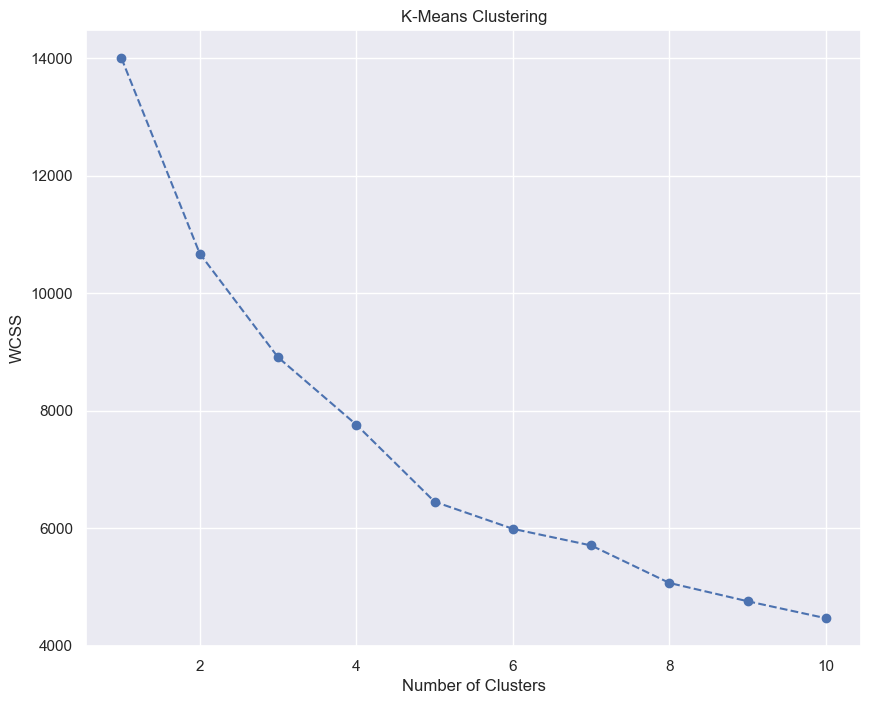

In [25]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
plt.show()

Our function is monotonically decreasing. Sometimes, it is smooth and sometimes it can be rapidly declining.

Depending on the shape of this graph, we make a decision about the number of clusters.

How do we choose how many number of clusters we want ? ---- > By using elbow method.

The goal of elbow method is to spot the elbow itself and take that many clusters. (The part below elbow would be steeply declining, while the part after it would be smoother.

The elbow point on your plot is the point where the rate of decrease in WCSS (Within-Cluster Sum of Squares) slows down noticeably. This is where adding more clusters doesn’t significantly improve the model.

The ideal elbow point here is at k = 5.
This is where the curve shifts from a steep drop to a more gradual slope. Adding more clusters beyond this point gives diminishing returns.

In [28]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)

In [29]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=5, random_state=42)

# Results

In [31]:
# Adding clustering results to our data
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_        # contains predicted clusters for each observation in our dataset

In [32]:
# With the above information, we will be able to find what the characteristics of the people in each of the clusters are.

In [33]:
# To gain some insight, we'll calculate the mean values of each features by clusters.
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.028302,0.000000,35.418239,0.619497,100066.210692,0.393082,0.110063
1,0.891705,0.652074,33.297235,1.108295,89360.076037,0.094470,0.000000
2,0.748582,0.979206,27.924386,1.003781,119900.778828,1.052930,0.814745
3,0.004264,0.044776,37.142857,0.710021,144048.624733,1.283582,1.539446
4,0.480000,0.684000,55.648000,2.136000,161276.772000,1.184000,1.160000


In [34]:
# From the above table, we've obtained the mean for the clusters found by our K-Means algorithm

Segment 0 - Young single males living in small cities, mostly high-school educated and working in low-skill jobs with moderate income.

Segment 1 - Young non-single females with low occupation levels living in small cities and earning lower income.

Segment 2 - Young married females, well-educated, working as skilled employees, living in mid-sized cities with moderate-to-high income.

Segment 3 - Single males, mid-30s, highly earning, skilled or in management, living in big cities.

Segment 4 - Older, well-educated, married individuals, mostly professionals living in urban areas, earning high income.

In [36]:
# Size of the clusters and their proportions compared to the entire data set.
df_segm_analysis['N Obs'] = df_segm_kmeans.groupby('Segment K-means')['Sex'].count()

In [37]:
# The above line counts the number of customers (rows) in each K-means segment and store it in a new column 'N Obs' in the df_segm_analysis DataFrame.

In [38]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
# It adds a new column called 'Prop Obs' to the df_segm_analysis DataFrame, containing the proportion (i.e., percentage) of observations in each cluster.

In [39]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.028302,0.000000,35.418239,0.619497,100066.210692,0.393082,0.110063,318,0.1590
1,0.891705,0.652074,33.297235,1.108295,89360.076037,0.094470,0.000000,434,0.2170
2,0.748582,0.979206,27.924386,1.003781,119900.778828,1.052930,0.814745,529,0.2645
3,0.004264,0.044776,37.142857,0.710021,144048.624733,1.283582,1.539446,469,0.2345
4,0.480000,0.684000,55.648000,2.136000,161276.772000,1.184000,1.160000,250,0.1250


In [40]:
df_segm_analysis.rename({0:"Rural Singles",
                        1:"Small Town Families",
                        2:"Young Professionals",
                        3:"Urban Entrepreneurs",
                        4:"Elite Retirees"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Rural Singles,0.028302,0.000000,35.418239,0.619497,100066.210692,0.393082,0.110063,318,0.1590
Small Town Families,0.891705,0.652074,33.297235,1.108295,89360.076037,0.094470,0.000000,434,0.2170
Young Professionals,0.748582,0.979206,27.924386,1.003781,119900.778828,1.052930,0.814745,529,0.2645
Urban Entrepreneurs,0.004264,0.044776,37.142857,0.710021,144048.624733,1.283582,1.539446,469,0.2345
Elite Retirees,0.480000,0.684000,55.648000,2.136000,161276.772000,1.184000,1.160000,250,0.1250


In [41]:
# Visualizing proportion of segments
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:"Rural Singles",
                                                                  1:"Small Town Families",
                                                                  2:"Young Professionals",
                                                                  3:"Urban Entrepreneurs",
                                                                  4:"Elite Retirees"})

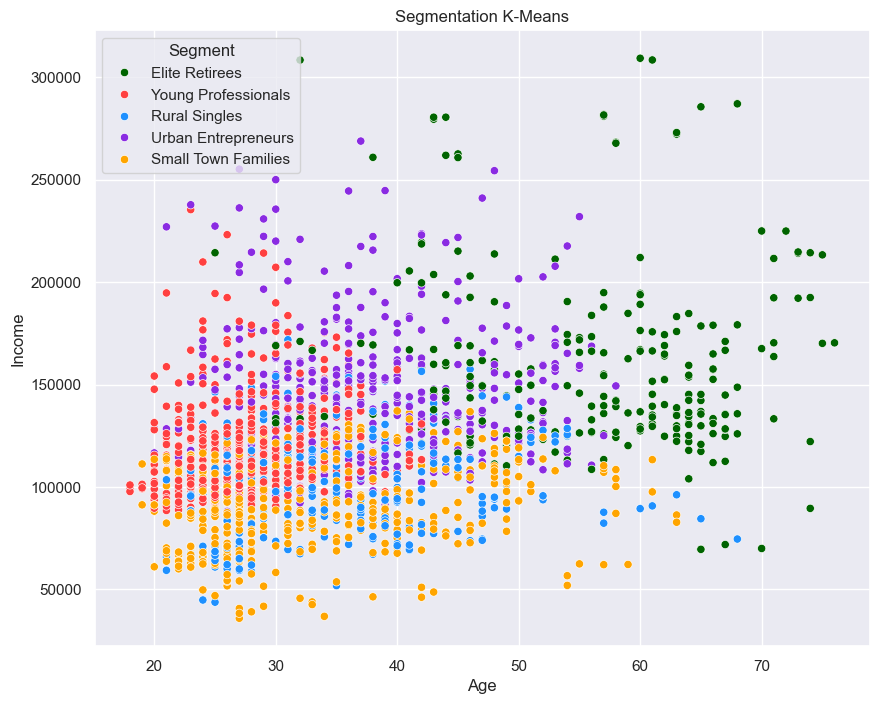

In [42]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue=df_segm_kmeans['Labels'], palette=['#006400', '#FF4040', '#1E90FF', '#8A2BE2', '#FFA500'])
plt.title('Segmentation K-Means')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Segment')
plt.show()

We can see the green segment is clearly separated, as it is highest in both age and income. 

# PCA

In [45]:
pca = PCA()

In [46]:
pca.fit(segmentation_std)

PCA()

PCA creates as many components as there are features in our data

These components are arranged in order of importance

Importance here indicates that how much of the variance of our data is explained by each component

In [48]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

PCA applied a linear transformation on our data, which created 7 new variables.

Together, these 7 components explain 100% variability of the data

Our task now will be to select a subset of components while preserving as much information as possible

Text(0, 0.5, 'Cumulative Explained Variance')

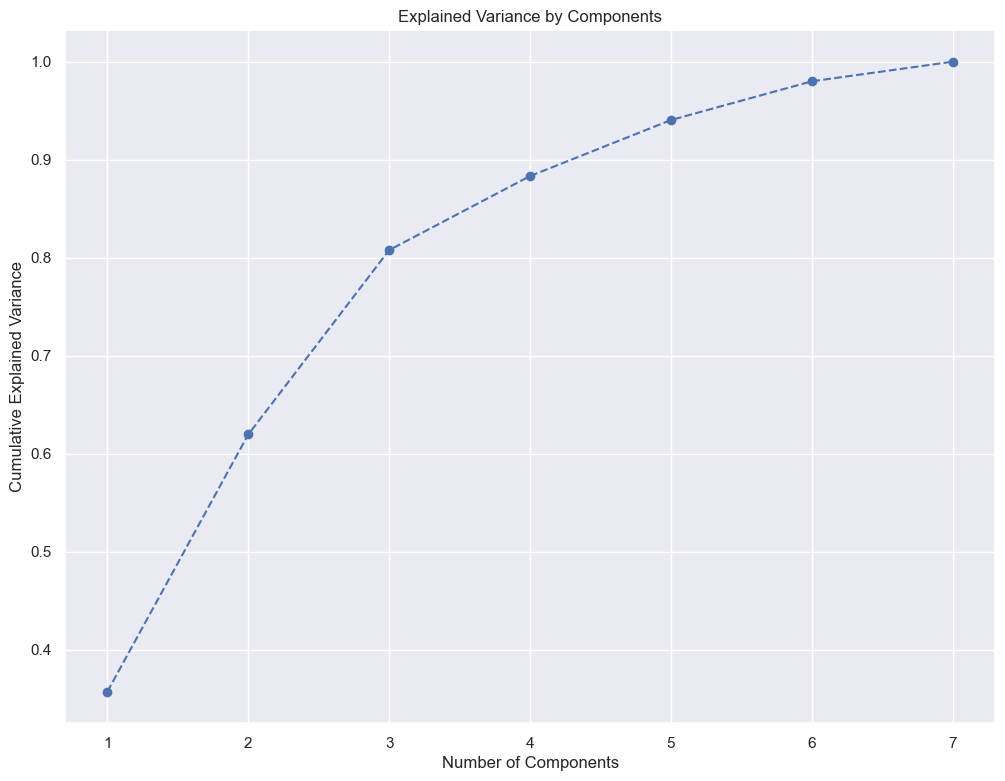

In [51]:
# Using line chart, it will show the cumulative explained varionce against the number of components chosen
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

By rule of thumb, we will keep 80% of the variance. So we'll take 3 components.

In [53]:
pca = PCA(n_components = 3)

In [54]:
pca.fit(segmentation_std)

PCA(n_components=3)

3 components: Less data may lead to faster training and potentially better generalization (less overfitting).

4 components: More data retained, so you may get better accuracy — but at the cost of higher complexity.

👉 Difference:
If you're feeding the PCA-transformed data into a machine learning model, using 4 components might give better performance, but 3 could generalize better on small datasets.

# PCA Results

In [57]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [58]:
# The values themselves show loadings.
# Loadings are correlations between an original variable and a component
# Loadings tell you which original features contribute most to each principal component.

Loadings are the coefficients (or weights) that define the principal components as linear combinations of the original features.

Let’s say you have 3 features:
X1, X2, and X3
After PCA, you get 2 principal components: PC1 and PC2
Then each PC is a linear combination like:

PC1 = a11 * X1 + a12 * X2 + a13 * X3  
PC2 = a21 * X1 + a22 * X2 + a23 * X3


Loadings tell you which original features contribute most to each principal component.

In [60]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [61]:
# The closer a result is to 0, the lower the loading of a variable onto a component.

([<matplotlib.axis.YTick at 0x23869c0fe60>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

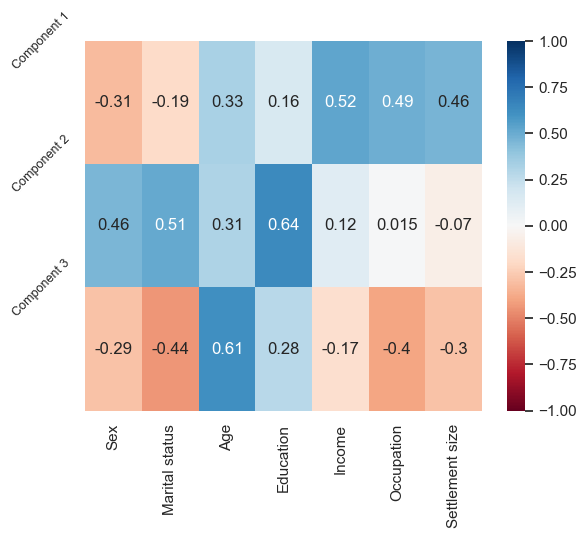

In [62]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [63]:
pca.transform(segmentation_std)     # PCA scores

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [64]:
scores_pca = pca.transform(segmentation_std)

# K-Means clustering with PCA

In [66]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)      # k-means ++ technique ensures centroids are at max distance from data points. And after that, we check which data points are nearer to these centroids.
    kmeans_pca.fit(scores_pca)    # this statement fits a k-means clustering model with i clusters to it
    wcss.append(kmeans_pca.inertia_)

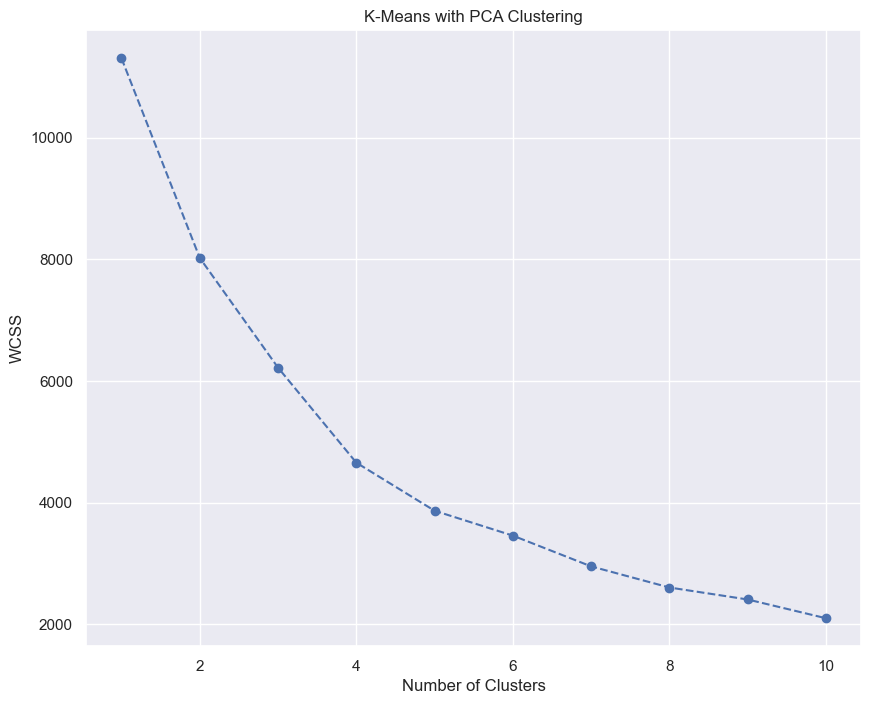

In [67]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

In [68]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [69]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

# K-means clustering with PCA Results

In [71]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3'] 
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_          # Predicted clusters for each observation

In [72]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [73]:
# Calculating mean values of each feature by clusters
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


Segment 0 - mid-career, moderately affluent urban males with basic to moderate education.

Segment 1 - younger, less affluent females in rural/small-town settings with entry-level education and limited employment.

Segment 2 - youthful, working-family profile of educated, employed women in suburban/mid-sized areas.

Segment 3 - older, established group of highly educated, affluent professionals in urban/suburban environments.

In [75]:
# Checking how many people belong to each cluster 
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans.groupby('Segment K-means PCA')['Sex'].count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Urban Achievers',
                                                          1:'Rural Beginners',
                                                          2:'Suburban Families',
                                                          3:'Elite Professionals'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Urban Achievers,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
Rural Beginners,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305
Suburban Families,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
Elite Professionals,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131


The point of PCA was to determine the most important components so we can be absolutely sure that the first 2 components explain
more variance than the third one.

In [77]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Urban Achievers',
                                                                              1:'Rural Beginners',
                                                                              2:'Suburban Families',
                                                                              3:'Elite Professionals'})

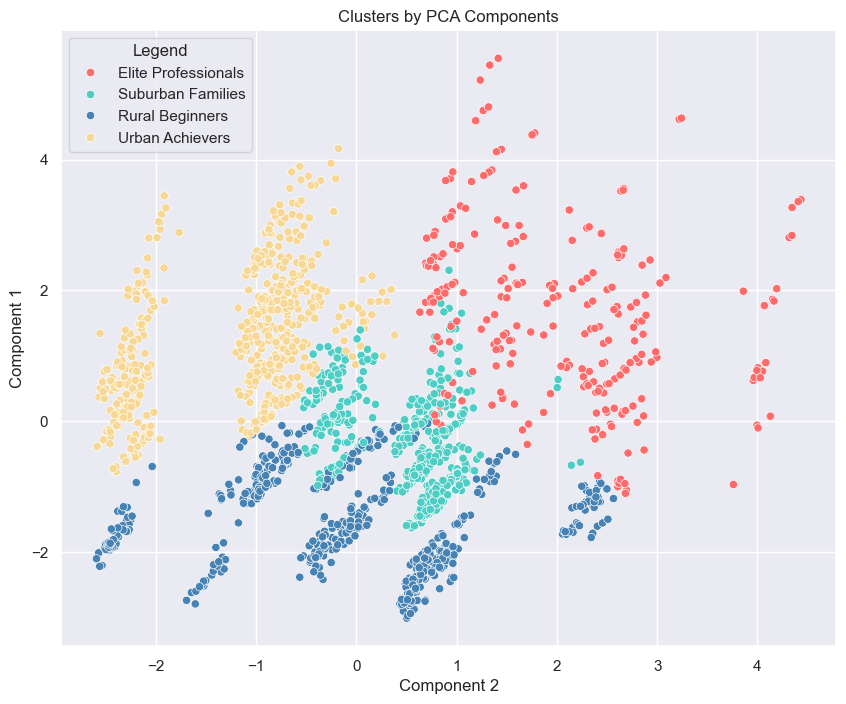

In [78]:
# Visualizing the segments w.r.t to the first 2 components 
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['#FF6B6B','#4ECDC4','#4682B4','#F7D794'])
plt.title('Clusters by PCA Components')
plt.show()

# Data Export

In [80]:
# Pickle is used to turn python objects into strings.
pickle.dump(scaler, open('scaler.pickle','wb'))                  # dump method is used to export a file

In [81]:
pickle.dump(pca, open('pca.pickle','wb'))

In [85]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))